# Level Up - WEEK5

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
house_data = df.drop(['id', 'date'], axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
# Visualization

## for not scaled data

In [3]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis=1)
target_data = house_data[['price']]

#train : test set을 8 : 2로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2)

#다시 train set을 8:2로 나눠 validation set을 만들어줍니다.
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2) 

print('모든 데이터', train_data.shape)
print('training set', x_train.shape, y_train.shape)
print('validation set', x_valid.shape, y_valid.shape)
print('test set', x_test.shape, y_test.shape)

모든 데이터 (21613, 18)
training set (13832, 18) (13832, 1)
validation set (3458, 18) (3458, 1)
test set (4323, 18) (4323, 1)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

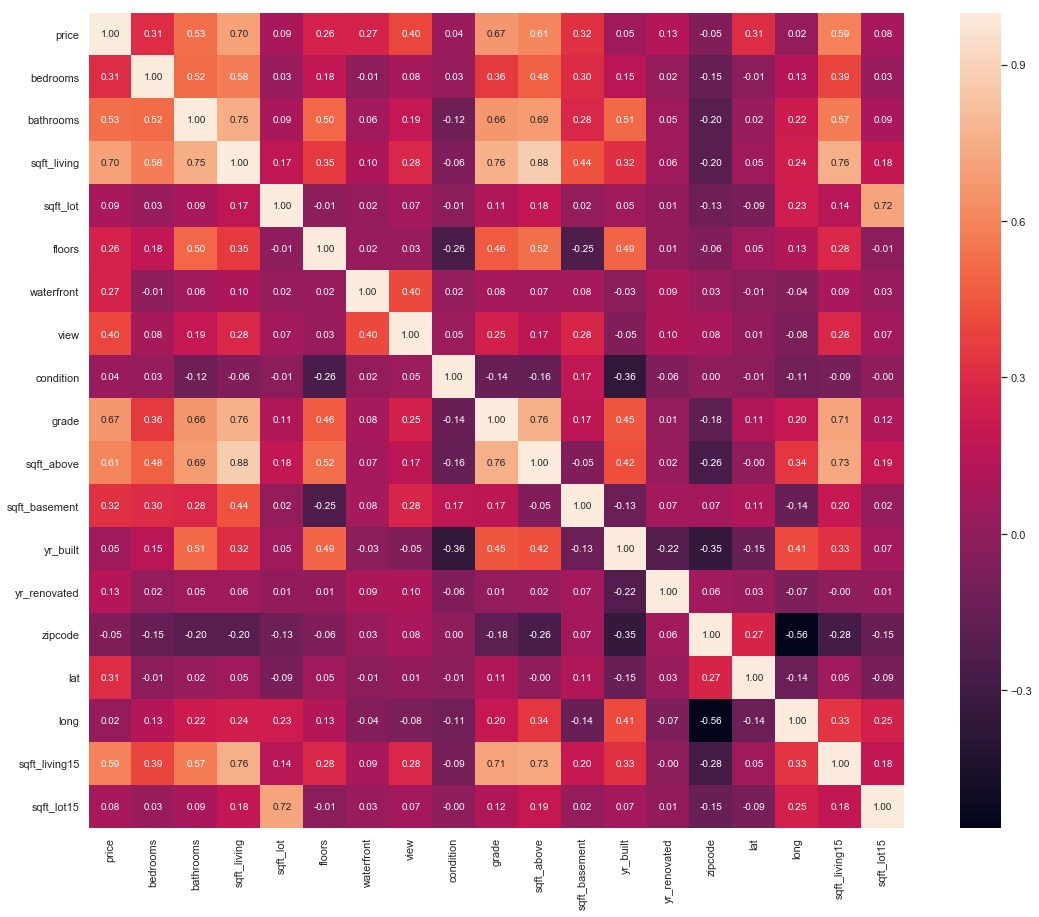

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(house_data.corr(), annot=True, fmt='.2f', square=True)

plt.show()

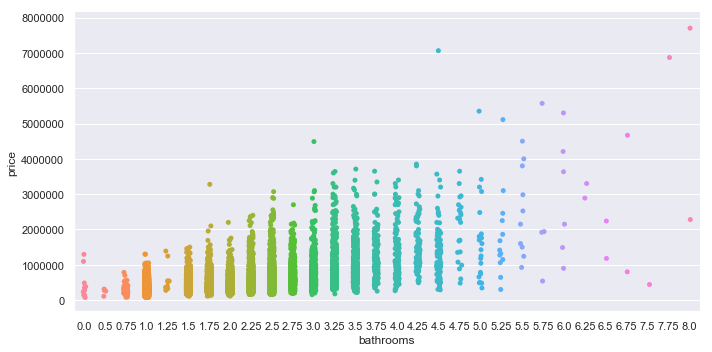

In [6]:
sns.catplot(data=house_data, x='bathrooms', y='price', aspect=2)

In [7]:
house_data['sqft_living'].max()

13540

In [8]:
house_data['price'].max()

7700000.0

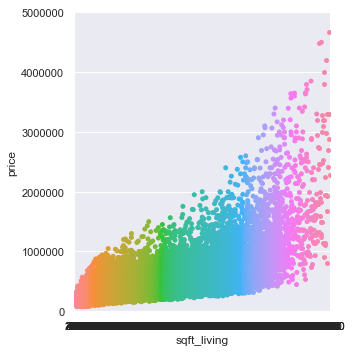

In [9]:
sns.catplot(data=house_data, x='sqft_living', y='price')\
    .set(ylim=(0, 5000000))

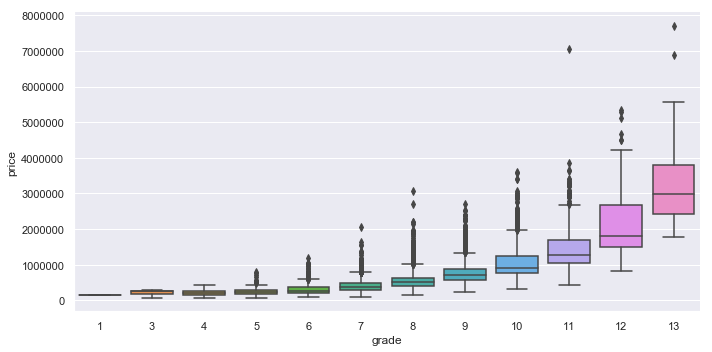

In [10]:
sns.catplot(kind='box', data=house_data, x='grade', y='price', aspect=2)

---
# Feature Scaling

## 자율$1

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs_train = scaler.fit_transform(x_train)
xs_train = pd.DataFrame(xs_train, columns=x_train.columns)

ys_train = scaler.fit_transform(y_train)
ys_train = pd.DataFrame(ys_train, columns=y_train.columns)

xs_valid = scaler.fit_transform(x_valid)
xs_valid = pd.DataFrame(xs_valid, columns=x_valid.columns)

ys_valid = scaler.fit_transform(y_valid)
ys_valid = pd.DataFrame(ys_valid, columns=y_valid.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 자율$2

In [12]:
xs_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04
mean,-1.558743e-16,1.257589e-16,-4.964179e-17,-3.374935e-17,-6.124206e-18,5.127959e-16,5.700087e-16,-2.857267e-16,4.031782e-16,6.982237e-17,-5.212077e-16,1.243615e-15,1.612159e-16,-2.413246e-14,-2.111963e-14,-8.140124e-14,1.025584e-16,-2.438044e-19
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-3.561058e+00,-2.735834e+00,-1.938686e+00,-3.448898e-01,-9.096469e-01,-8.490532e-02,-3.095280e-01,-3.674379e+00,-5.656839e+00,-1.796634e+00,-6.633706e-01,-2.405080e+00,-2.099512e-01,-1.452110e+00,-2.928696e+00,-2.171777e+00,-2.232210e+00,-4.462323e-01
25%,-3.945878e-01,-4.733844e-01,-7.061187e-01,-2.382559e-01,-9.096469e-01,-8.490532e-02,-3.095280e-01,-6.337563e-01,-5.599170e-01,-7.164964e-01,-6.633706e-01,-6.722080e-01,-2.099512e-01,-8.528201e-01,-6.457023e-01,-8.163427e-01,-7.260391e-01,-2.817204e-01
50%,-3.945878e-01,1.730298e-01,-1.871429e-01,-1.768825e-01,1.653903e-02,-8.490532e-02,-3.095280e-01,-6.337563e-01,-5.599170e-01,-2.724399e-01,-6.633706e-01,1.092834e-01,-2.099512e-01,-1.598917e-01,8.439934e-02,-1.172240e-01,-2.142336e-01,-1.882788e-01
75%,6.609022e-01,4.962370e-01,5.156367e-01,-1.036661e-01,9.427249e-01,-8.490532e-02,-3.095280e-01,8.865553e-01,2.895699e-01,4.956579e-01,6.137039e-01,8.567969e-01,-2.099512e-01,7.390425e-01,8.512504e-01,6.318318e-01,5.607861e-01,-9.773994e-02
max,3.127011e+01,7.606794e+00,1.238721e+01,3.860097e+01,3.721283e+00,1.177783e+01,4.862796e+00,2.406867e+00,4.537005e+00,9.148760e+00,1.013575e+01,1.502377e+00,4.809533e+00,2.255994e+00,1.573206e+00,6.346058e+00,6.176024e+00,3.126109e+01


In [13]:
ys_train.describe()

,price
count,1.383200e+04
mean,-5.494127e-18
std,1.000036e+00
min,-1.275813e+00
25%,-5.927405e-01
50%,-2.464130e-01
75%,2.979577e-01
max,1.959966e+01


---
# Visualization

## for scaled data

## 자율$3

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(house_data)
scaled_data = pd.DataFrame(scaled_data, columns=house_data.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
scaled_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.833746e-16,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,1.482989e-15,1.853096e-15,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,4.348961e-15,-8.953095e-14,-3.446807e-14,-3.637898e-14,-1.506632e-16,1.235382e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.266860e+00,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-1.438025e+00,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,-5.941897e-01,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-8.399369e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,-2.453924e-01,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,-2.418484e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,2.857709e-01,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,7.487357e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,1.950299e+01,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,2.262647e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


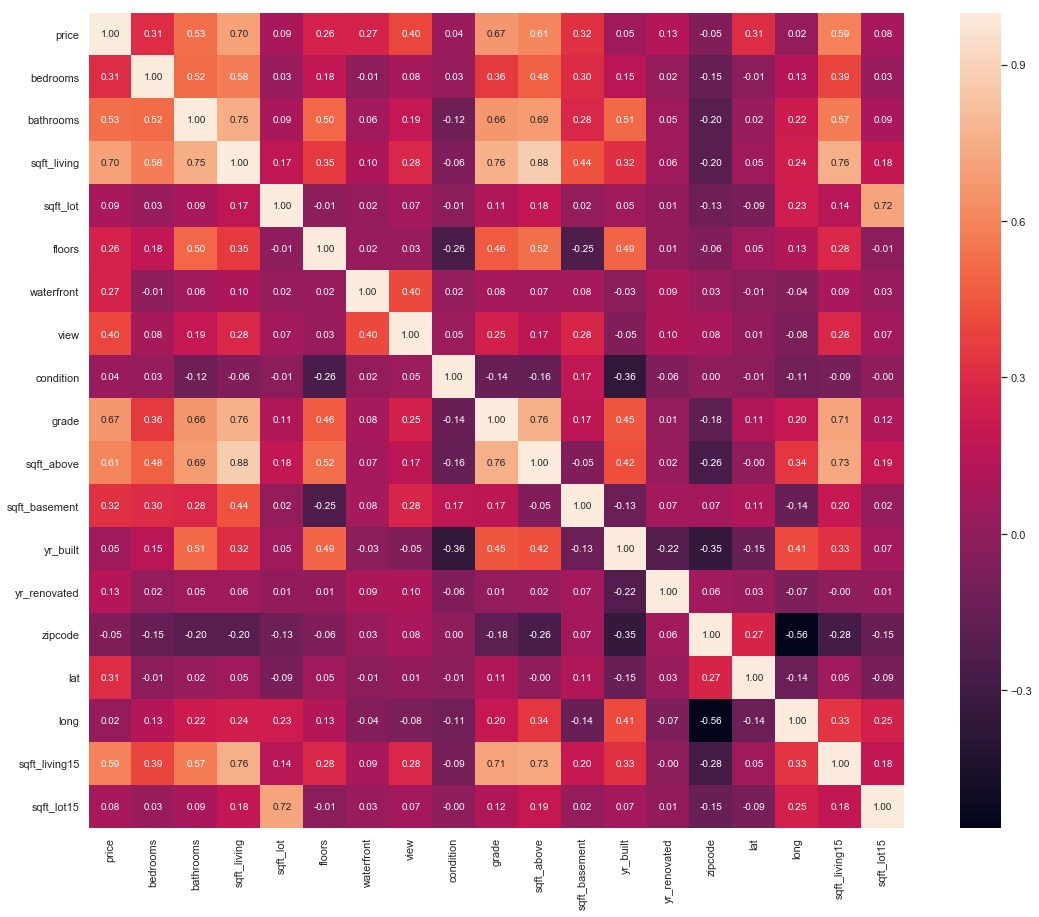

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(scaled_data.corr(), annot=True, fmt='.2f', square=True)

plt.show()

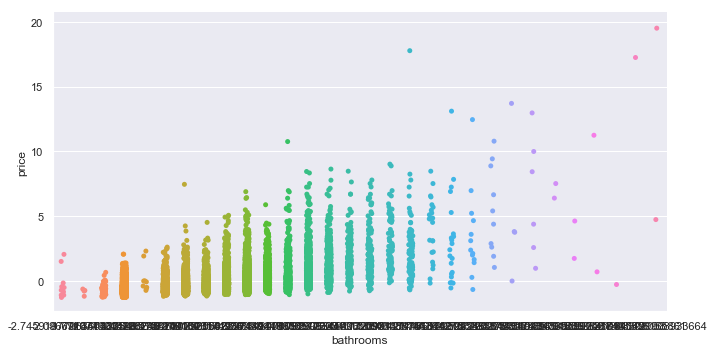

In [17]:
sns.catplot(data=scaled_data, x='bathrooms', y='price', aspect=2)

In [18]:
scaled_data['sqft_living'].max()

12.478065197571281

In [19]:
scaled_data['price'].max()

19.502988532556916

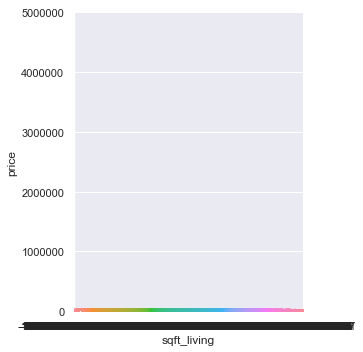

In [20]:
sns.catplot(data=scaled_data, x='sqft_living', y='price')\
    .set(ylim=(0, 5000000))

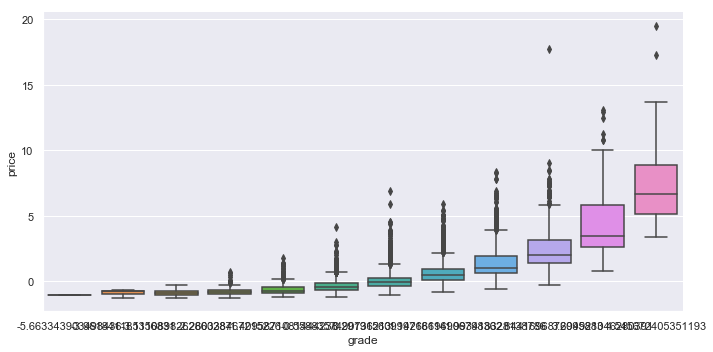

In [21]:
sns.catplot(kind='box', data=scaled_data, x='grade', y='price', aspect=2)

## 자율$4

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(xs_train, ys_train)

print("train set score:", lr.score(xs_train, ys_train))
print("valid set score:", lr.score(xs_valid, ys_valid))

train set score: 0.6960520971903525
valid set score: 0.7277641782628577


## 자율$5

### Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                      LinearRegression()).fit(xs_train, ys_train)

print("train set score:", model.score(xs_train, ys_train))
print("valid set score:", model.score(xs_valid, ys_valid))

train set score: 0.8292169026746835
valid set score: -4.087471670155868e+16


## 자율$6

In [24]:
model = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(xs_train, ys_train)

print("train set score:", model.score(xs_train, ys_train))
print("valid set score:", model.score(xs_valid, ys_valid))

# 위에서 train_test_split 을 통해 선별되는 train, valid 구성에 따라 점수가 크게 달라질 수 있습니다.
# train, valid set은 랜덤하게 나뉘어집니다.

train set score: 0.907875734654578
valid set score: -1.7238411411831536e+16


## 자율$7

In [25]:
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(2),
                      Ridge(alpha=0.1)).fit(xs_train, ys_train)

print("train set score:", model.score(xs_train, ys_train))
print("valid set score:", model.score(xs_valid, ys_valid))

train set score: 0.8292151675655606
valid set score: 0.807836509734929


## 자율$8

In [26]:
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(3),
                      Ridge(alpha=1500)).fit(xs_train, ys_train)

print("train set score:", model.score(xs_train, ys_train))
print("valid set score:", model.score(xs_valid, ys_valid))

train set score: 0.8890254055233635
valid set score: 0.83820757522357


## 자율$9

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(xs_train, ys_train)

print("train set score:", tree.score(xs_train, ys_train))
print("valid set score:", tree.score(xs_valid, ys_valid))

train set score: 0.999540272259674
valid set score: 0.7618217556998119


## 자율$10

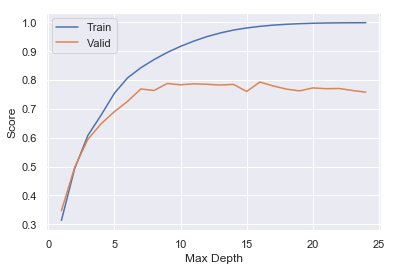

In [28]:
train_score = []
valid_score = []
depth_range = range(1, 25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth=depth).fit(xs_train, ys_train)
    
    train_score.append(tree.score(xs_train, ys_train))
    valid_score.append(tree.score(xs_valid, ys_valid))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()